In [1]:
import sys
sys.executable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the epf toolbox data package and read in 6 years of historical data from the NordPool database
# Returns a pandas dataframe for training and testing datasets
# Store in the /data directory
# Set the test dataset to the last 2 years of the dataset

from epftoolbox.data import read_data
df_train, df_test = read_data(path='NordPool_data/', dataset='NP', years_test=2)

In [3]:
# Use a helper function to ensure no NaN values in the df
import helper_functions as helper

df_train = helper.fill_nan_with_mean(df_train)
df_test = helper.fill_nan_with_mean(df_test)

# Inspect the datasets to ensure the training set and test set are the correct years
df_train.head()



,Price,Exogenous 1,Exogenous 2
Date,,,
2013-01-01 00:00:00,31.05,42497.0,2798.0
2013-01-01 01:00:00,30.47,41463.0,2417.0
2013-01-01 02:00:00,28.92,40812.0,2036.0
2013-01-01 03:00:00,27.88,40246.0,1706.0
2013-01-01 04:00:00,26.96,40088.0,1427.0


In [4]:
df_train.tail()

,Price,Exogenous 1,Exogenous 2
Date,,,
2016-12-26 19:00:00,27.44,46686.0,3395.0
2016-12-26 20:00:00,27.11,45935.0,2889.0
2016-12-26 21:00:00,26.82,45471.0,2129.0
2016-12-26 22:00:00,26.65,44386.0,1827.0
2016-12-26 23:00:00,25.68,43017.0,1689.0


In [5]:
df_test.head()

,Price,Exogenous 1,Exogenous 2
Date,,,
2016-12-27 00:00:00,24.08,42653.0,2124.0
2016-12-27 01:00:00,22.52,41868.0,1905.0
2016-12-27 02:00:00,20.13,41534.0,2053.0
2016-12-27 03:00:00,19.86,41642.0,2274.0
2016-12-27 04:00:00,20.09,42418.0,2549.0


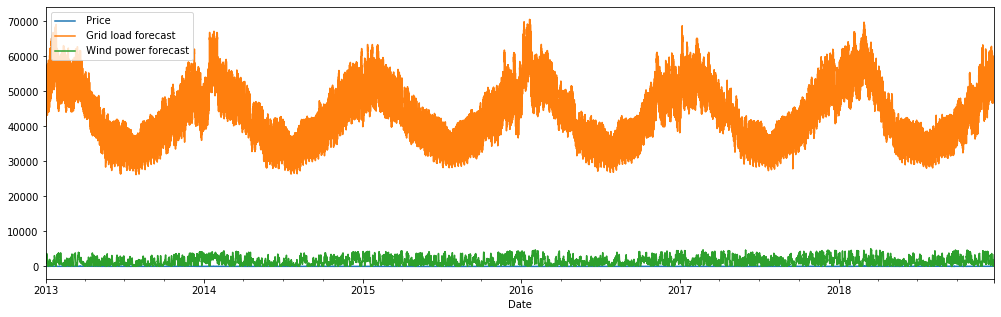

In [7]:
# Data Visulalisation
from pandas import read_csv
pre_normalisation = read_csv('NordPool_data/NP.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
pre_normalisation.plot(figsize=(17, 5))
plt.show()

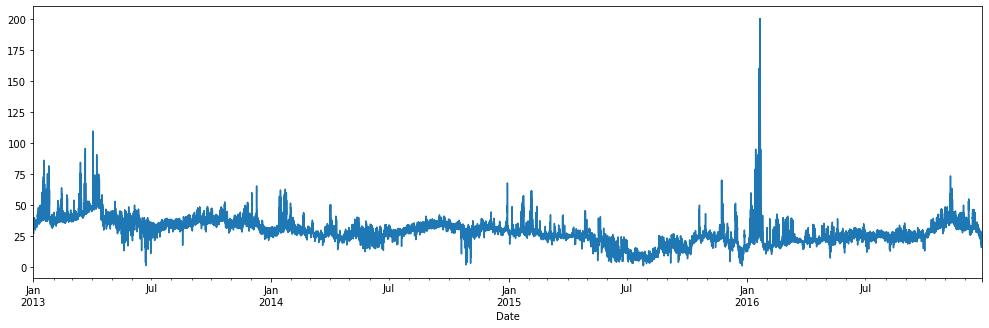

In [8]:
# Can see from the plot that the price is too small to be seen 
# on the same scale as the grid load and the wind power forecast.
# Scaling factor is needed
# Not sure which scaling method is best, will visualise to see
df_train.Price.plot(figsize=(17, 5))

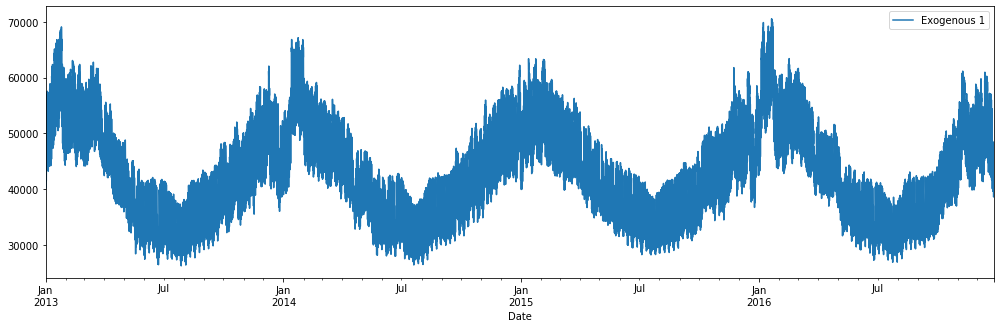

In [9]:
df_train.plot(y='Exogenous 1', figsize=(17, 5))

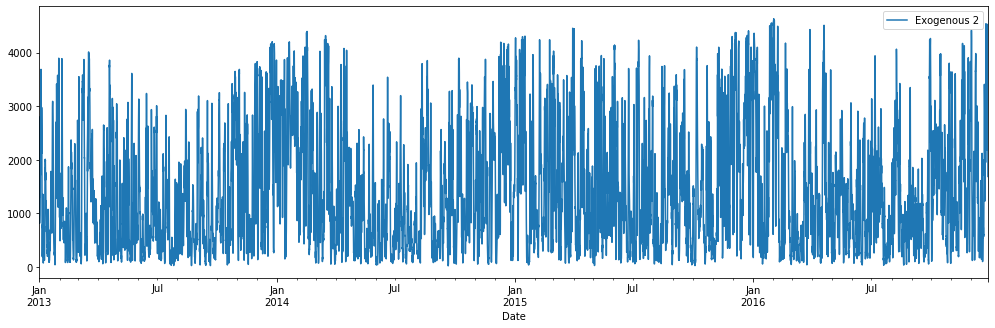

In [10]:
df_train.plot(y='Exogenous 2', figsize=(17, 5))

<function matplotlib.pyplot.show(*args, **kw)>

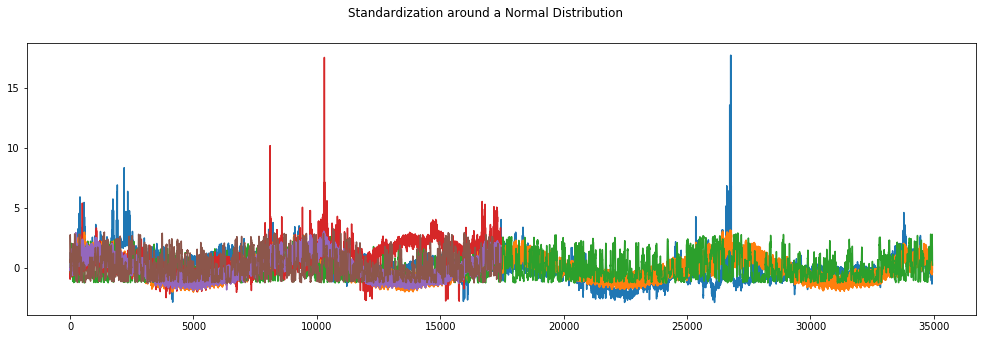

In [13]:
from epftoolbox.data import DataScaler

# Convert the data to a numpy array
X_train = df_train.values
X_test = df_test.values

# Create an Standard Distribution scaler 
scaler_std = DataScaler('Std')
X_train_scaled_std = scaler_std.fit_transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)
plt.figure(figsize=(17, 5))
plt.plot(X_train_scaled_std )
plt.plot(X_test_scaled_std)
plt.suptitle('Standardization around a Normal Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

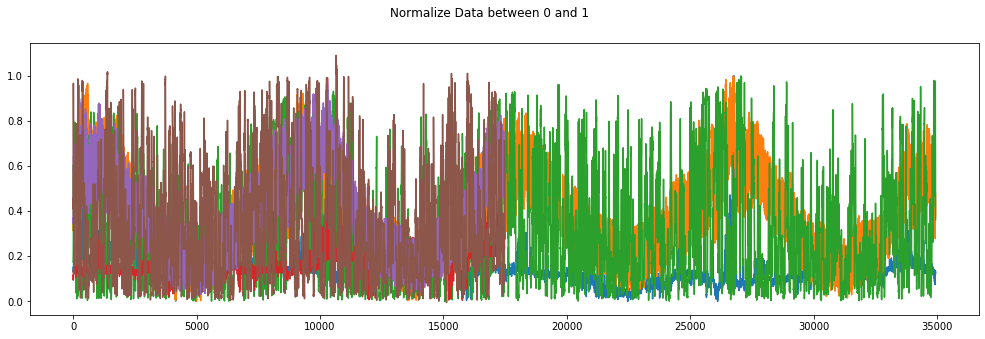

In [15]:
# Create scaler to normalise the data between 0 and 1
scaler_norm = DataScaler('Norm')
X_train_scaled_norm = scaler_norm.fit_transform(X_train)
X_test_scaled_norm = scaler_norm.transform(X_test)
plt.figure(figsize=(17, 5))
plt.plot(X_train_scaled_norm)
plt.plot(X_test_scaled_norm)
plt.suptitle('Normalize Data between 0 and 1')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

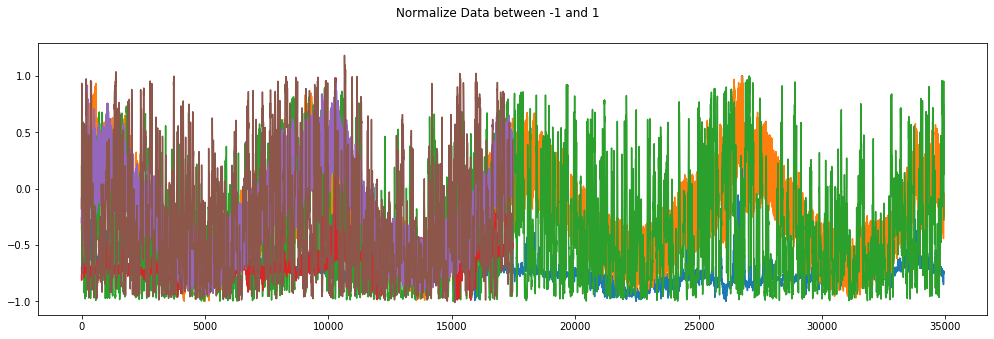

In [16]:
# Create scaler to normalise the data between -1 and 1
scaler_norm1 = DataScaler('Norm1')
X_train_scaled_norm1 = scaler_norm1.fit_transform(X_train)
X_test_scaled_norm1 = scaler_norm1.transform(X_test)
plt.figure(figsize=(17, 5))
plt.plot(X_train_scaled_norm1)
plt.plot(X_test_scaled_norm1)
plt.suptitle('Normalize Data between -1 and 1')
plt.show

In [26]:
X_train[:3,:]

array([[3.1050e+01, 4.2497e+04, 2.7980e+03],
       [3.0470e+01, 4.1463e+04, 2.4170e+03],
       [2.8920e+01, 4.0812e+04, 2.0360e+03]])

In [27]:
X_train_scaled_norm1[:3,:]

array([[-0.69913997, -0.26613158,  0.20486111],
       [-0.7049741 , -0.31275646,  0.03949653],
       [-0.72056531, -0.3421112 , -0.12586806]])

In [17]:
# Still too much variance in the standard normalisation, will use normal distribution
# Benchmark Model

from epftoolbox.models import hyperparameter_optimizer

# Number of layers in DNN
nlayers = 2

# Market under study. If it not one of the standard ones, the file name
# has to be provided, where the file has to be a csv file
dataset = 'NP'

# Number of years (a year is 364 days) in the test dataset.
years_test = 2

# Optional parameters for selecting the test dataset, if either of them is not provided, 
# the test dataset is built using the years_test parameter. They should either be one of
# the date formats existing in python or a string with the following format
# "%d/%m/%Y %H:%M"
begin_test_date = None
end_test_date = None

# Boolean that selects whether the validation and training datasets are shuffled
shuffle_train = 0

# Boolean that selects whether a data augmentation technique for DNNs is used
data_augmentation = 0

# Boolean that selects whether we start a new hyperparameter optimization or we restart an existing one
new_hyperopt = 1

# Number of years used in the training dataset for recalibration
calibration_window = 4

# Unique identifier to read the trials file of hyperparameter optimization
experiment_id = 1

# Number of iterations for hyperparameter optimization
max_evals = 20

path_datasets_folder = "NordPool_data/datasets/"
path_hyperparameters_folder = "NordPool_data/experimental_files/"

#import io
#with io.open(filename, 'r', encoding='utf8') as f:
#    text = f.read()
# process Unicode text
#with io.open(filename, 'w', encoding='utf8') as f:
#    f.write(text)

# Check documentation of the hyperparameter_optimizer for each of the function parameters
# In this example, we optimize a model for the PJM market.
# We consider two directories, one for storing the datasets and the other one for the experimental files.
# We start a hyperparameter optimization from scratch. We employ 1500 iterations in hyperopt,
# 2 years of test data, a DNN with 2 hidden layers, a calibration window of 4 years,
# we avoid data augmentation,  and we provide an experiment_id equal to 1
hyperparameter_optimizer(path_datasets_folder=path_datasets_folder, 
                         path_hyperparameters_folder=path_hyperparameters_folder, 
                         new_hyperopt=new_hyperopt, max_evals=max_evals, nlayers=nlayers, dataset=dataset, 
                         years_test=years_test, calibration_window=calibration_window, 
                         shuffle_train=shuffle_train, data_augmentation=0, experiment_id=experiment_id,
                         begin_test_date=begin_test_date, end_test_date=end_test_date)



Tested 1/20 iterations.
Best MAE - Validation Dataset
  MAE: 5.7 | sMAPE: 15.18 %

Best MAE - Test Dataset
  MAE: 7.0 | sMAPE: 18.40 %


Tested 2/20 iterations.
Best MAE - Validation Dataset
  MAE: 3.3 | sMAPE: 8.73 %

Best MAE - Test Dataset
  MAE: 4.3 | sMAPE: 11.29 %


Tested 3/20 iterations.
Best MAE - Validation Dataset
  MAE: 3.3 | sMAPE: 8.73 %

Best MAE - Test Dataset
  MAE: 4.3 | sMAPE: 11.29 %


Tested 4/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.9 | sMAPE: 7.68 %

Best MAE - Test Dataset
  MAE: 3.8 | sMAPE: 10.66 %


Tested 5/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.9 | sMAPE: 7.68 %

Best MAE - Test Dataset
  MAE: 3.8 | sMAPE: 10.66 %


Tested 6/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.9 | sMAPE: 7.68 %

Best MAE - Test Dataset
  MAE: 3.8 | sMAPE: 10.66 %


Tested 7/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


/home/ec2-user/SageMaker/Electricity_price_forecasting/epftoolbox/data/_wrangling.py:95: RuntimeWarning: overflow encountered in sinh
  transformed_data = np.sinh(data)
/home/ec2-user/SageMaker/Electricity_price_forecasting/epftoolbox/data/_wrangling.py:67: RuntimeWarning: overflow encountered in multiply
  transformed_data[:, i] = data[:, i] * self.mad[i] + self.median[i]
/home/ec2-user/SageMaker/Electricity_price_forecasting/epftoolbox/evaluation/_smape.py:118: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs(p_real - p_pred) / ((np.abs(p_real) + np.abs(p_pred)) / 2))




Tested 8/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 9/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 10/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 11/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 12/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 13/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 14/20 iterations.
Best MAE - Validation Dataset
  MAE: 2.2 | sMAPE: 5.74 %

Best MAE - Test Dataset
  MAE: 2.3 | sMAPE: 6.72 %


Tested 15/20 iterations.
Best MAE - Validation D

In [ ]:
from epftoolbox.models import evaluate_dnn_in_test_dataset
import os

# Number of layers in DNN
nlayers = 2

# Market under study. If it not one of the standard ones, the file name
# has to be provided, where the file has to be a csv file
dataset = 'NP'

# Number of years (a year is 364 days) in the test dataset.
years_test = 2

# Boolean that selects whether the validation and training datasets were shuffled when
# performing the hyperparameter optimization. Note that it does not select whether
# shuffling is used for recalibration as for recalibration the validation and the
# training datasets are always shuffled.
shuffle_train = 0

# Boolean that selects whether a data augmentation technique for DNNs is used
data_augmentation = 0

# Boolean that selects whether we start a new recalibration or we restart an existing one
new_recalibration = 1

# Number of years used in the training dataset for recalibration
calibration_window = 4

# Unique identifier to read the trials file of hyperparameter optimization
experiment_id = 1

# Optional parameters for selecting the test dataset, if either of them is not provided, 
# the test dataset is built using the years_test parameter. They should either be one of
# the date formats existing in python or a string with the following format
# "%d/%m/%Y %H:%M"
begin_test_date = None
end_test_date = None

# Set up the paths for saving data (this are the defaults for the library)
path_datasets_folder = os.path.join('.', 'NordPool_data/datasets')
path_recalibration_folder = os.path.join('.', 'NordPool_data/experimental_files')
path_hyperparameter_folder = os.path.join('.', 'NordPool_data/experimental_files')

evaluate_dnn_in_test_dataset(experiment_id, path_hyperparameter_folder=path_hyperparameter_folder, 
                               path_datasets_folder=path_datasets_folder, shuffle_train=shuffle_train, 
                               path_recalibration_folder=path_recalibration_folder, 
                               nlayers=nlayers, dataset=dataset, years_test=years_test, 
                               data_augmentation=data_augmentation, calibration_window=calibration_window, 
                               new_recalibration=new_recalibration, begin_test_date=begin_test_date, 
                               end_test_date=end_test_date)

2016-12-27 - sMAPE: 6.03%  |  MAE: 1.562
2016-12-28 - sMAPE: 5.82%  |  MAE: 1.610
2016-12-29 - sMAPE: 6.03%  |  MAE: 1.688
2016-12-30 - sMAPE: 5.28%  |  MAE: 1.478
2016-12-31 - sMAPE: 4.96%  |  MAE: 1.374
2017-01-01 - sMAPE: 4.99%  |  MAE: 1.391
2017-01-02 - sMAPE: 4.96%  |  MAE: 1.410
2017-01-03 - sMAPE: 4.85%  |  MAE: 1.387
2017-01-04 - sMAPE: 4.98%  |  MAE: 1.438
2017-01-05 - sMAPE: 5.12%  |  MAE: 1.564
2017-01-06 - sMAPE: 7.03%  |  MAE: 2.357
2017-01-07 - sMAPE: 6.93%  |  MAE: 2.313
2017-01-08 - sMAPE: 6.97%  |  MAE: 2.319
2017-01-09 - sMAPE: 6.87%  |  MAE: 2.282
2017-01-10 - sMAPE: 6.95%  |  MAE: 2.298
2017-01-11 - sMAPE: 6.81%  |  MAE: 2.236
2017-01-12 - sMAPE: 6.78%  |  MAE: 2.210
2017-01-13 - sMAPE: 6.74%  |  MAE: 2.190
2017-01-14 - sMAPE: 6.79%  |  MAE: 2.191
2017-01-15 - sMAPE: 6.64%  |  MAE: 2.137
2017-01-16 - sMAPE: 6.92%  |  MAE: 2.323
2017-01-17 - sMAPE: 7.45%  |  MAE: 2.538
2017-01-18 - sMAPE: 7.45%  |  MAE: 2.528
2017-01-19 - sMAPE: 7.37%  |  MAE: 2.493
2017-01-20 - sMA